In [620]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
plt.rcParams['figure.figsize'] =(10,6)

In [621]:
#dataset

data=pd.read_csv("Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


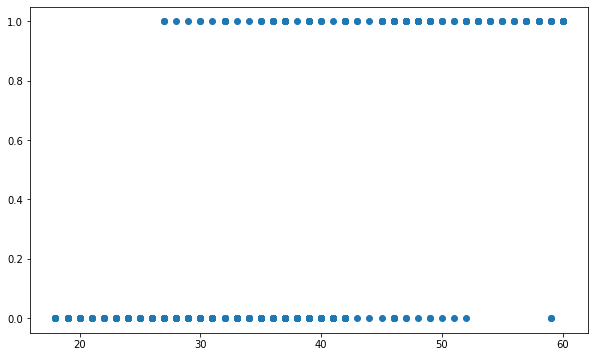

In [622]:
plt.scatter(data['Age'],data['Purchased'])
plt.show()

In [623]:
#split training training and test data 
X_train, X_test, y_train, y_test = train_test_split(data['Age'], data['Purchased'], test_size=0.20)



In [624]:
#normalize data 
def normalize(X):
    return X-X.mean()
def predict(X,b0,b1):
    return np.array([1 /(1+exp(-1*b0 + -1*b1*x))for x in X])
def logistical_regression(X,Y):
    x=normalize(X)

    b0 = 0
    b1 = 0
    print(b1,b0)
    L=0.001
    epochs=300
    for epoch in range(epochs):
        y_pred=predict(X,b0,b1)
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b0
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b1
        b0=b0-L*D_b0
        b1=b1-L*D_b1
    return b0,b1


In [625]:
b0,b1=logistical_regression(X_train,y_train)
print("b0b1   ",b0,b1)
x_test_norm=normalize(X_test)
y_pred=predict(x_test_norm,b0,b1)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]


0 0
b0b1    -0.024483177598687494 -0.41922457242287914


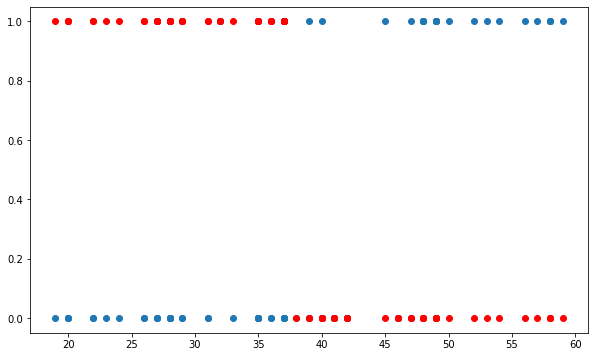

Accuracy =0.275
320


In [626]:
plt.clf()
plt.scatter(X_test,y_test)
plt.scatter(X_test,y_pred,c="red")


#plt.plot(X_test, y_pred, c="red", linestyle='-', marker='o') # Only if values are sorted
plt.show()
#accuracy counter
accuracy =0
for i in range(len(y_pred)):
    if y_pred[i]==y_test.iloc[i]:
        accuracy+=1
print(f"Accuracy ={accuracy / len(y_pred)}")
print(len(X_train))

    